number of countires 167
number of features 10


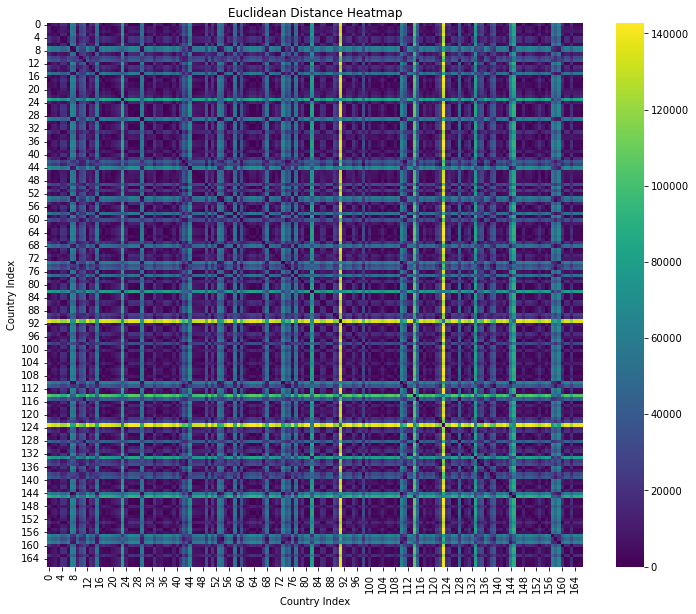

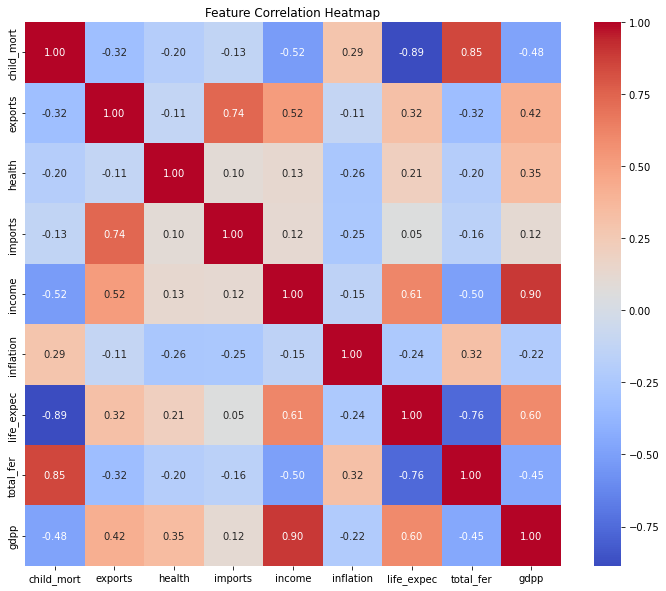

In [11]:
import pandas as pd
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

# Load the country-data.csv
country_data = pd.read_csv('Country-data.csv')

# Describe the data
num_samples = country_data.shape[0]  # Number of countries (samples)
num_features = country_data.shape[1]  # Number of features

print("number of countires" , num_samples)
print("number of features" ,num_features)

# Calculating Euclidean distances between countries
euclidean_distances = squareform(pdist(country_data.iloc[:, 1:], 'euclidean'))  # Exclude country names

# Plotting Euclidean distance
plt.figure(figsize=(12, 10))
sns.heatmap(euclidean_distances, cmap='viridis')
plt.title('Euclidean Distance Heatmap')
plt.xlabel('Country Index')
plt.ylabel('Country Index')
plt.show()

# Calculating and plotting correlation between features
feature_correlation = country_data.iloc[:, 1:].corr()  # Exclude country names
plt.figure(figsize=(12, 10))
sns.heatmap(feature_correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


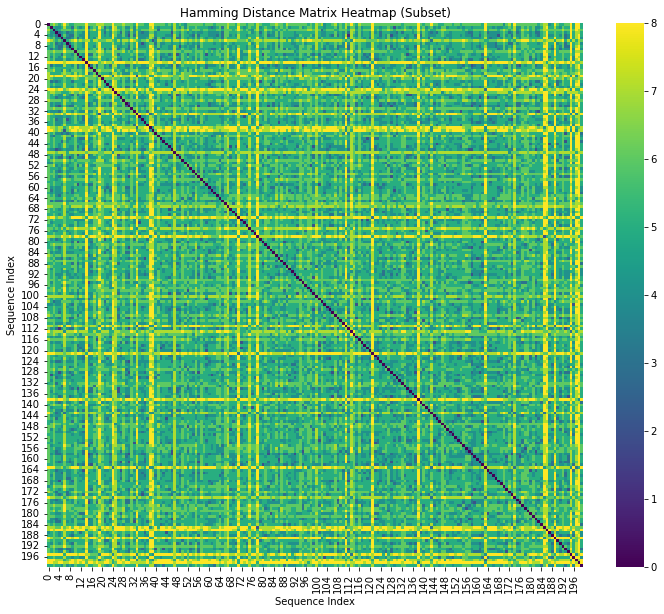

In [4]:
import numpy as np

# Load the test_tcrs.csv data
tcrs_data = pd.read_csv('test_tcrs.csv')

# Calculate the Hamming distance matrix for the sequences

from itertools import combinations

def efficient_hamming_distance_matrix(sequences):
    # Initialize the matrix with zeros
    n = len(sequences)
    distance_matrix = np.zeros((n, n))
    
    # Calculate Hamming distance for each unique pair of sequences
    for (i, seq1), (j, seq2) in combinations(enumerate(sequences), 2):
        distance_matrix[i, j] = distance_matrix[j, i] = np.sum(np.array(list(seq1)) != np.array(list(seq2)))
    
    return distance_matrix

# Due to computational intensity, we will still use a subset of 200 for demonstration
subset_sequences = tcrs_data['Clonotype CDR3(Beta)'].head(200).tolist()
hamming_matrix_subset = efficient_hamming_distance_matrix(subset_sequences)

# Plot the Hamming distance matrix as a heatmap for the subset
plt.figure(figsize=(12, 10))
sns.heatmap(hamming_matrix_subset, cmap='viridis')
plt.title('Hamming Distance Matrix Heatmap (Subset)')
plt.xlabel('Sequence Index')
plt.ylabel('Sequence Index')
plt.show()


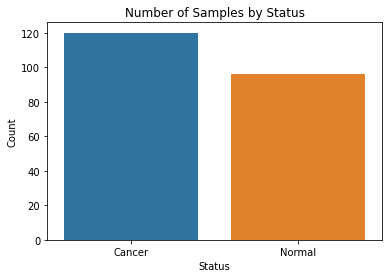

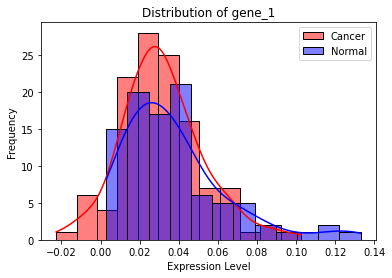

Gene: gene_1
Log2 Fold Change: -0.2380229371828503
T-test p-value: 0.08979109753459866
Mann-Whitney p-value: 0.3971031674099791



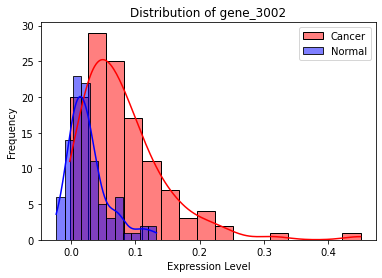

Gene: gene_3002
Log2 Fold Change: 1.6255639181537604
T-test p-value: 2.432487010472944e-13
Mann-Whitney p-value: 2.5643479615401806e-15


In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, mannwhitneyu

# Load the ovarian cancer data
ovarian_cancer_data = pd.read_csv('ovarian_cancer.csv')

# Plot the number of samples with each status
sns.countplot(x='status', data=ovarian_cancer_data)
plt.title('Number of Samples by Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

# Determine the number of genes measured
num_genes = len(ovarian_cancer_data.columns[2:])  # Excluding 'status' and 'patients' columns

# Function to plot distributions and calculate log2 fold change
def plot_distributions_and_calculate_log2_fold_change(data, gene_label):
    cancer_samples = data[data['status'] == 'Cancer'][gene_label]
    normal_samples = data[data['status'] == 'Normal'][gene_label]
    
    sns.histplot(cancer_samples, color="red", label='Cancer', kde=True)
    sns.histplot(normal_samples, color="blue", label='Normal', kde=True)
    plt.legend()
    plt.title(f'Distribution of {gene_label}')
    plt.xlabel('Expression Level')
    plt.ylabel('Frequency')
    plt.show()
    
    # Calculate the log2 fold change
    mean_cancer = cancer_samples.mean()
    mean_normal = normal_samples.mean()
    log2_fold_change = np.log2(mean_cancer / mean_normal) if mean_normal != 0 else float('inf')
    return log2_fold_change

# Function to perform the t-test and Mann-Whitney-Wilcoxon test
def perform_statistical_tests(data, gene_label):
    cancer_samples = data[data['status'] == 'Cancer'][gene_label]
    normal_samples = data[data['status'] == 'Normal'][gene_label]
    
    # Perform the t-test
    t_stat, p_ttest = ttest_ind(cancer_samples, normal_samples, equal_var=False)
    
    # Perform the Mann-Whitney-Wilcoxon test
    u_stat, p_mannwhitney = mannwhitneyu(cancer_samples, normal_samples)
    
    return p_ttest, p_mannwhitney

# Choose two genes to perform the analysis on
gene_1 = 'gene_1'  # Replace with the correct column name 
gene_2 = 'gene_3002'  # Replace with the correct column name

# Analysis for gene_1
log2_fold_change_gene_1 = plot_distributions_and_calculate_log2_fold_change(ovarian_cancer_data, gene_1)
p_ttest_gene_1, p_mannwhitney_gene_1 = perform_statistical_tests(ovarian_cancer_data, gene_1)

# Output the results for gene_1
print(f"Gene: {gene_1}")
print(f"Log2 Fold Change: {log2_fold_change_gene_1}")
print(f"T-test p-value: {p_ttest_gene_1}")
print(f"Mann-Whitney p-value: {p_mannwhitney_gene_1}\n")

# Analysis for gene_2
log2_fold_change_gene_2 = plot_distributions_and_calculate_log2_fold_change(ovarian_cancer_data, gene_2)
p_ttest_gene_2, p_mannwhitney_gene_2 = perform_statistical_tests(ovarian_cancer_data, gene_2)

# Output the results for gene_2
print(f"Gene: {gene_2}")
print(f"Log2 Fold Change: {log2_fold_change_gene_2}")
print(f"T-test p-value: {p_ttest_gene_2}")
print(f"Mann-Whitney p-value: {p_mannwhitney_gene_2}")

